## This project is to predict the time series data with LSTM neural network. 

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
stock_data=pd.read_csv('aapl_data.csv')

# Data explore

In [3]:
stock_data.head()

,date,open,high,low,close,volume
0,3/1/2013,15.643,15.649,15.356,15.374,552447168
1,3/4/2013,15.279,15.293,14.964,15.002,582737596
2,3/5/2013,15.053,15.543,15.027,15.398,638428168
3,3/6/2013,15.518,15.545,15.158,15.202,460249076
4,3/7/2013,15.161,15.429,15.038,15.378,468471304


Text(0, 0.5, 'Prices ($)')

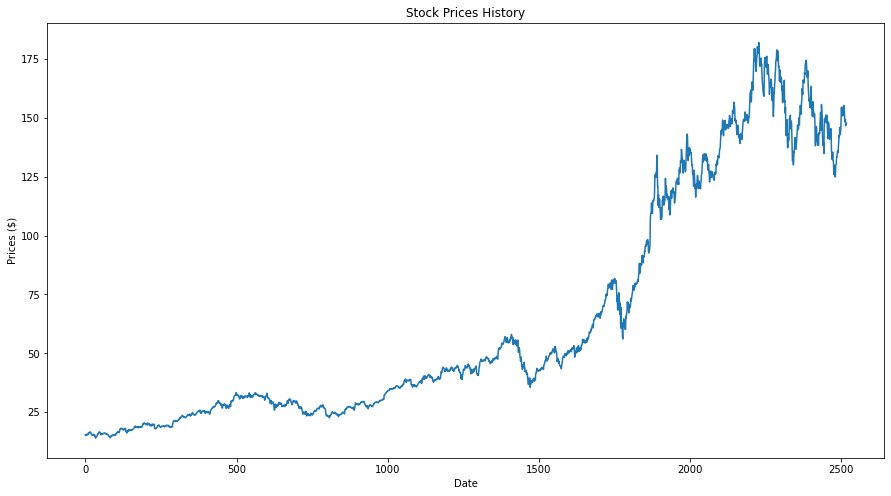

In [4]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# Data Processing

In [5]:
close_prices = stock_data['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
x_train[0],y_train[0]#using last 60 days data to predict the next data points

(array([[0.00848496],
        [0.0062715 ],
        [0.00862777],
        [0.00746153],
        [0.00850876],
        [0.00875272],
        [0.01005581],
        [0.0080506 ],
        [0.00803275],
        [0.00891338],
        [0.0112875 ],
        [0.01385203],
        [0.01359022],
        [0.01307851],
        [0.01321536],
        [0.01516702],
        [0.01551808],
        [0.01500042],
        [0.01307851],
        [0.01107329],
        [0.00815175],
        [0.00834216],
        [0.00880627],
        [0.00790185],
        [0.00693792],
        [0.00758054],
        [0.00774119],
        [0.0095917 ],
        [0.00930609],
        [0.00834216],
        [0.00622984],
        [0.00758649],
        [0.00260618],
        [0.00032131],
        [0.        ],
        [0.00172555],
        [0.00331425],
        [0.00317145],
        [0.00379027],
        [0.00566458],
        [0.00840761],
        [0.01110305],
        [0.01035927],
        [0.01168021],
        [0.01263224],
        [0

## Preparation of test set

In [7]:
test_data = scaled_data[training_data_len-60:, : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
x_test[0]

array([[0.64935559],
       [0.64852257],
       [0.64441694],
       [0.65334222],
       [0.65709084],
       [0.64162035],
       [0.65030762],
       [0.64536897],
       [0.64162035],
       [0.67791648],
       [0.67749997],
       [0.68279563],
       [0.67062751],
       [0.67999905],
       [0.70171722],
       [0.69624305],
       [0.70225274],
       [0.73033761],
       [0.71950828],
       [0.71266556],
       [0.70653687],
       [0.68702027],
       [0.69654056],
       [0.67030025],
       [0.69600505],
       [0.70272875],
       [0.68446169],
       [0.68339065],
       [0.69582654],
       [0.68404517],
       [0.67351335],
       [0.67761897],
       [0.70260975],
       [0.73140865],
       [0.74449905],
       [0.76740727],
       [0.76883531],
       [0.76229011],
       [0.73271769],
       [0.70219324],
       [0.71516464],
       [0.7202223 ],
       [0.7139746 ],
       [0.73450274],
       [0.73075413],
       [0.73164665],
       [0.72629149],
       [0.722

## Setting Up LSTM Network Architecture


In [9]:
x_train.shape[1], 1

(60, 1)

In [11]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
________________________________________________

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1954/1954 [==============================] - 69s 36ms/step - loss: 0.0018
Epoch 2/3
1954/1954 [==============================] - 66s 34ms/step - loss: 0.0015
Epoch 3/3
1954/1954 [==============================] - 67s 34ms/step - loss: 0.0011


In [13]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.034143290889428

<ipython-input-15-16c375ac7934>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


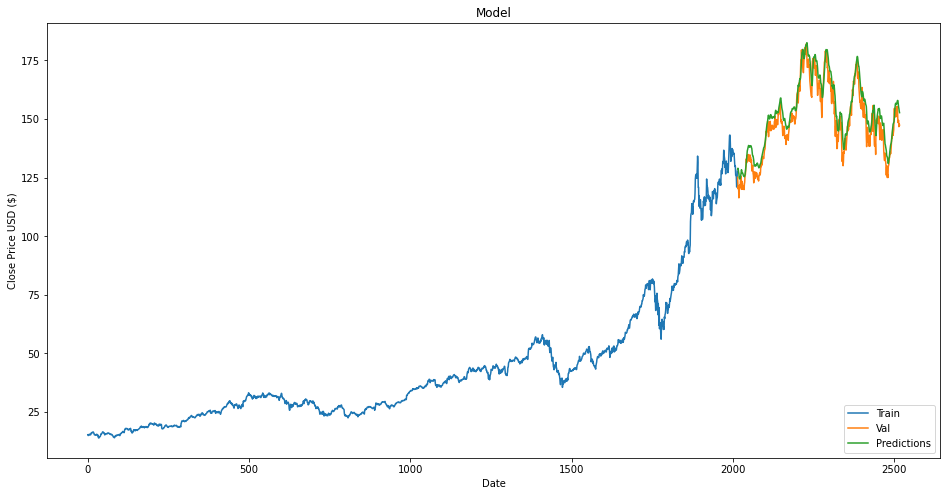

In [15]:
data = stock_data.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
stock_data.tail()

,date,open,high,low,close,volume
2512,2/22/2023,148.87,149.95,147.16,148.91,51011305
2513,2/23/2023,150.09,150.34,147.24,149.40,48394249
2514,2/24/2023,147.11,147.19,145.72,146.71,55469606
2515,2/27/2023,147.71,149.17,147.45,147.92,44998470
2516,2/28/2023,147.05,149.08,146.83,147.41,50546998


In [19]:
validation

,close,Predictions
2014,125.12,128.572830
2015,122.06,128.988968
2016,120.13,128.473373
2017,121.42,127.327141
2018,116.36,126.624298
...,...,...
2512,148.91,156.393188
2513,149.40,155.197968
2514,146.71,154.446442
2515,147.92,153.325211
